### Load and Split Data
Load a CSV file and split Data and labels from data.

Next split train and test data using sklearn train_test_split

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import itertools
import warnings
warnings.simplefilter('ignore')
plt.style.use('fivethirtyeight')
diab = pd.read_csv("diabetes.csv")

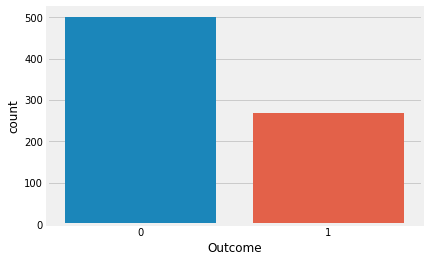

In [2]:
sns.countplot(x='Outcome',data=diab)
plt.show()

### Brief Analysis of Data

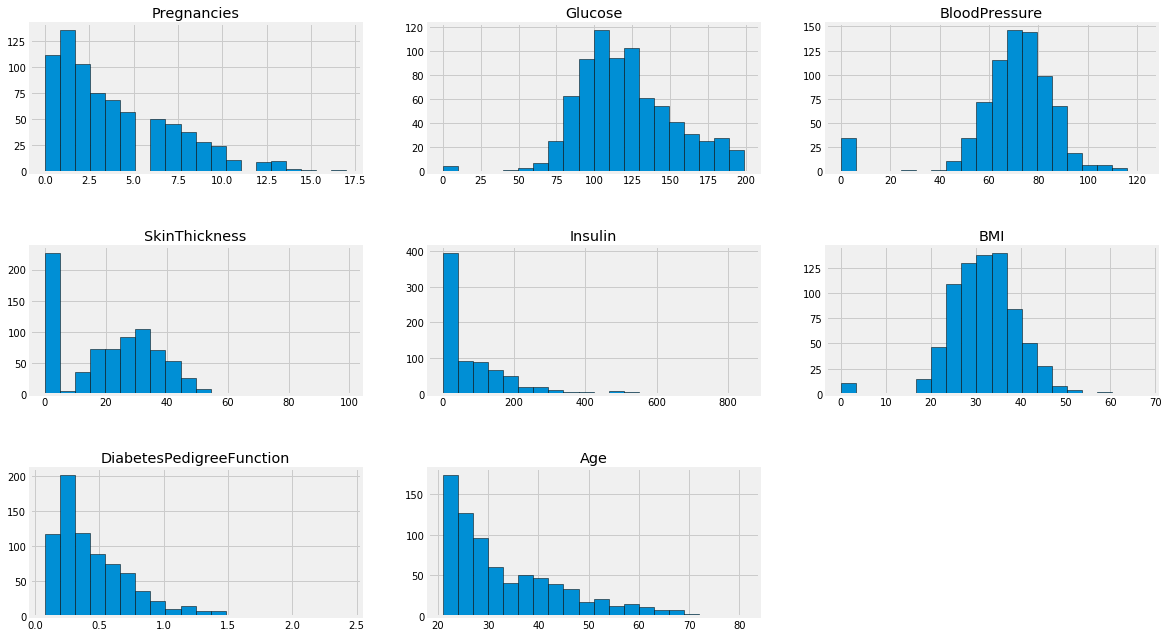

In [3]:
columns=diab.columns[:8]
plt.subplots(figsize=(18,15))
length=len(columns)
for i,j in itertools.zip_longest(columns,range(length)):
    plt.subplot((length/2),3,j+1)
    plt.subplots_adjust(wspace=0.2,hspace=0.5)
    diab[i].hist(bins=20,edgecolor='black')
    plt.title(i)
plt.show()

### Analysis of Diabetic Cases

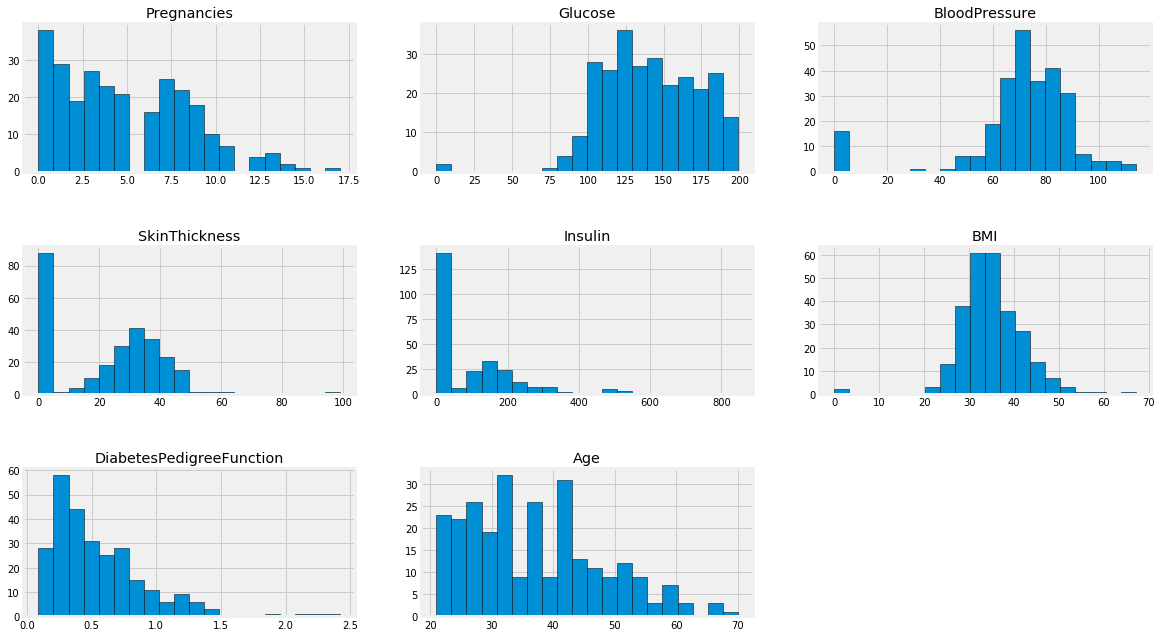

In [4]:
diab1=diab[diab['Outcome']==1]
columns=diab.columns[:8]
plt.subplots(figsize=(18,15))
length=len(columns)
for i,j in itertools.zip_longest(columns,range(length)):
    plt.subplot((length/2),3,j+1)
    plt.subplots_adjust(wspace=0.2,hspace=0.5)
    diab1[i].hist(bins=20,edgecolor='black')
    plt.title(i)
plt.show()

In [5]:
X = diab.iloc[:, 1: -1]
y = diab.iloc[:, -1:]
X.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,148,72,35,0,33.6,0.627,50
1,85,66,29,0,26.6,0.351,31
2,183,64,0,0,23.3,0.672,32
3,89,66,23,94,28.1,0.167,21
4,137,40,35,168,43.1,2.288,33


In [6]:
X_train = np.asarray(X)
y_train = np.asarray(y)

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

### Feature Selection using Random Forest
Here we will apply feature selection using random forest classifier.

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
clf = RandomForestClassifier()
clf = clf.fit(X_train, y_train)
model = SelectFromModel(clf, prefit=True)
New_Train_features = model.transform(X_train)
New_Test_features = model.transform(X_test)
print("Old Shape:", X_train.shape)
print("New Shape", New_Train_features.shape)

Old Shape: (576, 7)
New Shape (576, 4)


In [9]:
from sklearn.svm import SVC

svmLinear = SVC(kernel="linear")
svmLinearRandom = SVC(kernel="linear")
svmRBF = SVC(kernel="rbf")
svmRBFRandom = SVC(kernel="rbf")

In [10]:
svmLinearOriginal = svmLinear.fit(X_train, y_train)
svmLinearRandom = svmLinearRandom.fit(New_Train_features, y_train)
svmRBFOriginal = svmRBF.fit(X_train, y_train)
svmRBFRandom = svmRBFRandom.fit(New_Train_features, y_train) 

In [12]:
svmScoreLO = svmLinear.score(X_test, y_test) * 100
svmScoreL = svmLinearRandom.score(New_Test_features, y_test) * 100
svmScoreRO = svmRBF.score(X_test, y_test) * 100
svmScoreR = svmRBFRandom.score(New_Test_features, y_test) * 100
print("SVM with Linear kernel and original Data", svmScoreL)
print("SVM with Linear kernel and original Data", svmScoreLO)
print("SVM with Linear kernel and original Data", svmScoreR)
print("SVM with Linear kernel and original Data", svmScoreRO)

SVM with Linear kernel and original Data 78.125
SVM with Linear kernel and original Data 79.16666666666666
SVM with Linear kernel and original Data 64.0625
SVM with Linear kernel and original Data 67.70833333333334


In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
def plotRes(score, statement):
    plt.clf()
    labels = ['True', 'False']
    sizes = [int(svmScore), 100 - int(svmScore)]
    colors = ['lightcoral', 'lightskyblue']
    explode = (0, 0)  # explode 1st slice

    # Plot
    plt.pie(sizes, explode=explode, labels=labels, colors=colors,
    autopct='%1.1f%%', shadow=True, startangle=163)
    plt.title(statement)
    plt.axis('equal')
    plt.show()

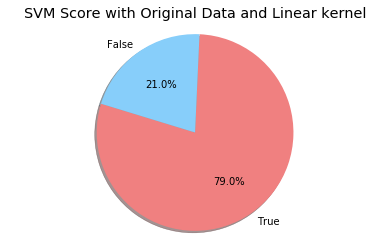

In [15]:
labels = ['True', 'False']
sizes = [int(svmScoreLO), 100 - int(svmScoreLO)]
statement = "SVM Score with Original Data and Linear kernel"
colors = ['lightcoral', 'lightskyblue']
explode = (0, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=163)
plt.title(statement)
plt.axis('equal')
plt.show()

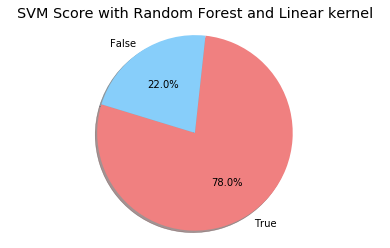

In [16]:
labels = ['True', 'False']
sizes = [int(svmScoreL), 100 - int(svmScoreL)]
statement = "SVM Score with Random Forest and Linear kernel"
colors = ['lightcoral', 'lightskyblue']
explode = (0, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=163)
plt.title(statement)
plt.axis('equal')
plt.show()

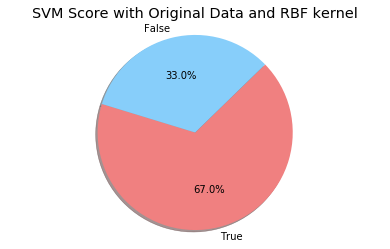

In [17]:
labels = ['True', 'False']
sizes = [int(svmScoreRO), 100 - int(svmScoreRO)]
statement = "SVM Score with Original Data and RBF kernel"
colors = ['lightcoral', 'lightskyblue']
explode = (0, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=163)
plt.title(statement)
plt.axis('equal')
plt.show()

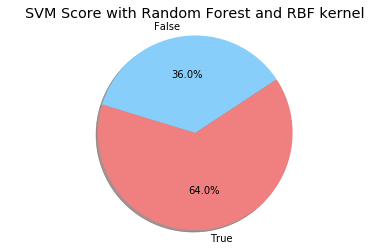

In [18]:
labels = ['True', 'False']
sizes = [int(svmScoreR), 100 - int(svmScoreR)]
statement = "SVM Score with Random Forest and RBF kernel"
colors = ['lightcoral', 'lightskyblue']
explode = (0, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=163)
plt.title(statement)
plt.axis('equal')
plt.show()